In [48]:
import numpy as np

from michigrad2.michigrad.visualize import show_graph
from michigrad2.michigrad.engine import Value
from michigrad2.michigrad.nn import Module, Neuron, Layer, MLP, TanH, Sigmoid, ReLU

In [66]:
np.random.seed(41)
modelo = MLP(layers=[
    Layer(2, 2),   
    Sigmoid(),        # Esta es la capa de activacion no lineal, puede ser TanH y relU tambien
    Layer(2, 1),   
])

xs = [[0,0], [0,1], [1,0], [1,1]]
ys = [0, 1, 1, 0]
yHats = [modelo(x)[0] for x in xs]


#se imprimen los valores predichos por el modelo
yHats

[Value(data=-0.38185662944931265, grad=0, name=),
 Value(data=-0.45484426176736736, grad=0, name=),
 Value(data=-0.249013424143179, grad=0, name=),
 Value(data=-0.3182775928239234, grad=0, name=)]

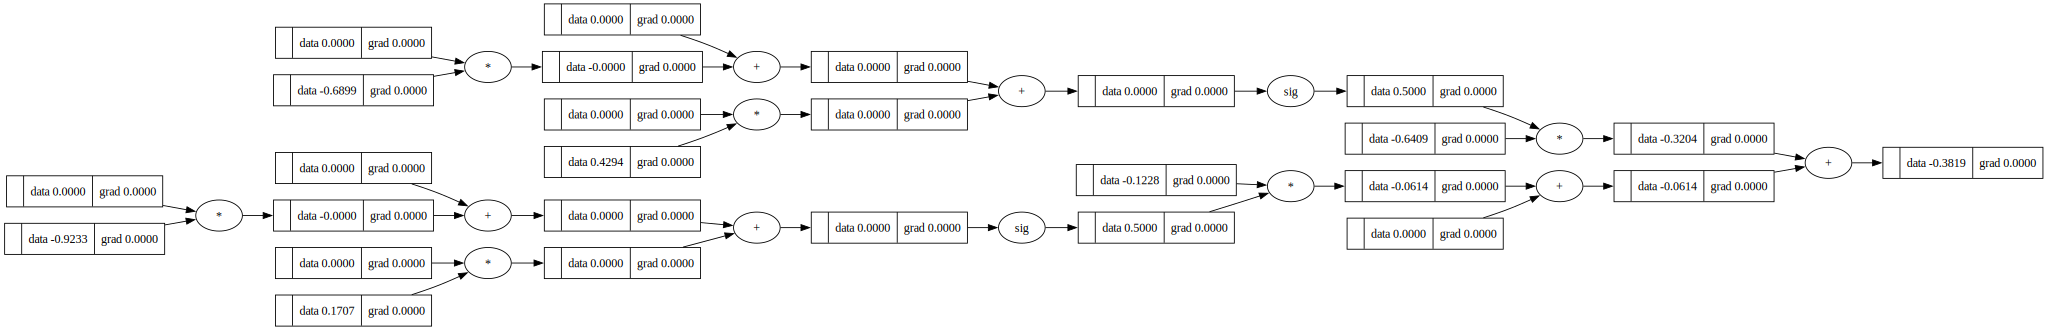

In [67]:
#muestra el grafo computacional del modelo para la primera prediccion (resultado de la etapa forward)
show_graph(yHats[0])

In [68]:
#Bucle de entrenamiento del modelo 

lr = 0.05
step = 10000
resultados = []
for _ in range(step):
    #forward pass
    yHats = [modelo(x)[0] for x in xs]

    #calculo de la perdida (loss)
    loss = sum([(y-yhat)**2 for y,yhat, in zip(ys, yHats)])/4

    #Gradientes en cero
    for p in modelo.parameters():
        p.grad = 0
    
    #backward pass
    loss.backward()

    #Se agregan los resultados de la perdida para graficar
    resultados.append(loss.data)

    #Actualizacion de los pesos
    for p in modelo.parameters():
        p.data -= p.grad * lr

loss

Value(data=5.2968293120906736e-17, grad=1, name=)

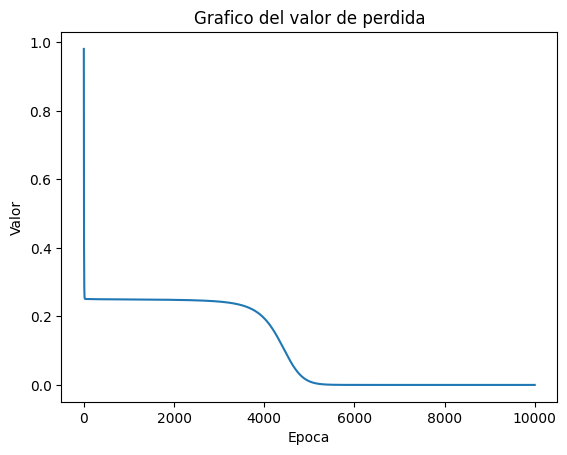

In [69]:
#funcion para graficar el valor de perdida del modelo

import matplotlib.pyplot as plt 


plt.plot(resultados)

plt.title("Grafico del valor de perdida")
plt.xlabel("Epoca")
plt.ylabel("Valor")

plt.show()


In [70]:
#Resultados finales del modelo despues del entrenamiento
xs = [[0,0],[0,1],[1,0],[1,1]]
print(modelo(xs[0])[0], modelo(xs[1])[0], modelo(xs[2])[0], modelo(xs[3])[0])


Value(data=8.96599816613275e-09, grad=0, name=) Value(data=0.9999999940114028, grad=0, name=) Value(data=0.9999999913735064, grad=0, name=) Value(data=4.449422164043426e-09, grad=0, name=)
